# 머신러닝 데이터 분석

### 머신러닝 개요

#### 머신러닝이란?

머신러닝(machine learning)
- 기계(컴퓨터 알고리즘) 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정
- 해결하려는 문제에 따라 예측(prediction), 분류(classification), 군집(cluctering) 알고리즘 등으로 분류

#### 지도학습 vs 비지도 학습

지도학습(supervised learning)
- 정답 데이터를 다른 데이터와 함께 컴퓨터 알고리즘에 입력하는 방식
- 회귀분석, 분류 모형
- 모형 평가 방법이 다양함

비지도 학습(unsupervised learning)
- 정답 데이터 없이 컴퓨터 알고리즘 스스로 데이터로부터 숨은 패턴을 찾아내는 방식
- 군집 분석
- 모형 평가 방법이 제한적임

- 지도학습 -> 정답지가 있어서 정답을 맞춰보며 문제를 풀어가는 학습 방법
- 비지도 학습 -> 정답지 없이 스스로 답을 찾는 학습 방법

#### 머신러닝 프로세스

- 머신러닝 데이터 분석을 시작하기 전에 컴퓨터 알고리즘이 이해할 수 있는 형태로 데이터를 변환하는 작업이 선행되어야 함
- 분석 대상에 관해 수집한 관측값(observation)을 속성(feature 또는 variable)을 기준으로 정리
- 판다스를 이용하여 데이터프레임으로 정리하는 작업이 필요
- 데이터프레임의 열은 속성을 나타내는 변수들이 위치
- 데이터프레임의 행은 하나의 관측값
- 분석 대상에 대한 관측값의 개수만큼 행을 늘림

- 컴퓨터 알고리즘이 이해할 수 있도록 데이터프레임으로 변환한 다음에는 여러 속성(변수) 간의 관계를 분석하여 결과를 예측하는 모형을 학습을 통해 찾음
- 훈련 데이터(train data) : 모형 학습에 사용하는 데이터
- 검증 데이터(test data) : 학습을 마친 모형의 예측 능력을 평가하기 위한 데이터
- 검증 과정을 통해 학습을 마친 모형의 예측 능력을 평가하고, 평가 결과를 바탕으로 최종 모형을 확정하여 문제 해결에 적용

머신러닝 프로세스
- 데이터 정리 -> 데이터 분리(훈련/검증) -> 알고리즘 준비 -> 모형 학습(훈련 데이터) -> 예측(검증 데이터) -> 모형 평가 -> 모형 활용

### 회귀 분석

회귀 분석(regression)
- 머신러닝 알고리즘 중에서도 비교적 이해하기 쉽고, 널리 활용되고 있는 알고리즘
- 연속적인 값을 갖는 연속 변수를 예측하는데 주로 활용
- 분석모형이 예측하고자 하는 목표를 종속(dependent) 변수 또는 예측(predictor) 변수라고 부름

#### 단순 회귀 분석

단순 회귀 분석(Simple Liner Regression)
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘
- 어떤 변수(독립 변수 X)가 다른 변수(종속 변수 Y)에 영향을 준다면 두 변수 사이에 선형 관계가 있다고 함
- 선형관계를 알고 있다면 새로운 독립변수 X 값이 주어졌을 때 거기에 대응되는 종속변수 Y 값을 예측할 수 있음

- 수학적으로는 종속변수 Y와 독립변수 X 사이의 관계를 일차함수 Y = aX + b로 나타냄
- 단순회귀분석 알고리즘은 훈련 데이터를 이용하여 직선의 기울기(a)와 직선이 y축과 교차하는 지점인 y절편( b)을 반복 학습을 통해 찾음
- 변수 X와 Y에 대한 정보를 가지고, 일차 방정식의 계수 a, b를 찾는 과정

step 1 - 데이터 준비

In [2]:
# 7.1_sample_liner_regression.py

# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/Users/youju/Downloads/5674-833_4th/part7/auto-mpg.csv', header = None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# 데이터 살펴보기
print(df.head())
print('\n')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

Step 2 - 데이터 탐색

In [3]:
'''
[step 2] - 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [4]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)
print(df['horsepower'].unique()) # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace = True) # '?'을 np.nan으로 변경
df.dropna(subset = ['horsepower'], axis = 0, inplace = True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환

print(df.describe())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

Step 3 - 속성 선택

In [5]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


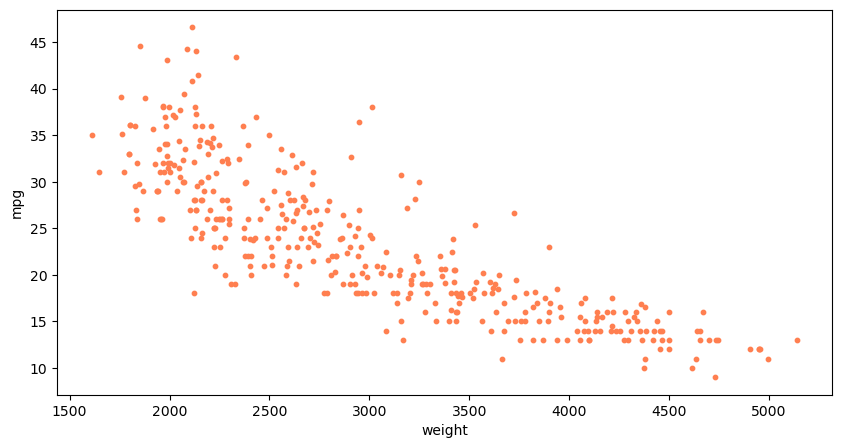

In [7]:
# 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형 관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', s = 10, figsize = (10, 5))
plt.show()
plt.close()

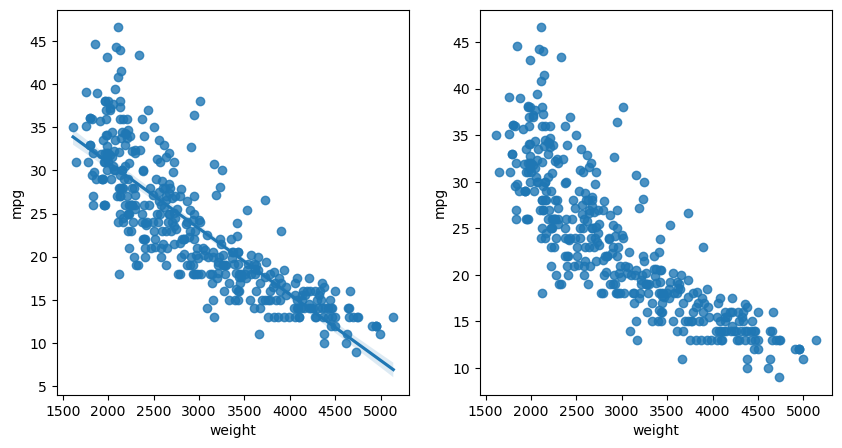

In [8]:
# seaborn으로 산점도 그래기
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax1) # 회귀선 표시
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax2, fit_reg = False) # 회귀선 미표시
plt.show()
plt.close()

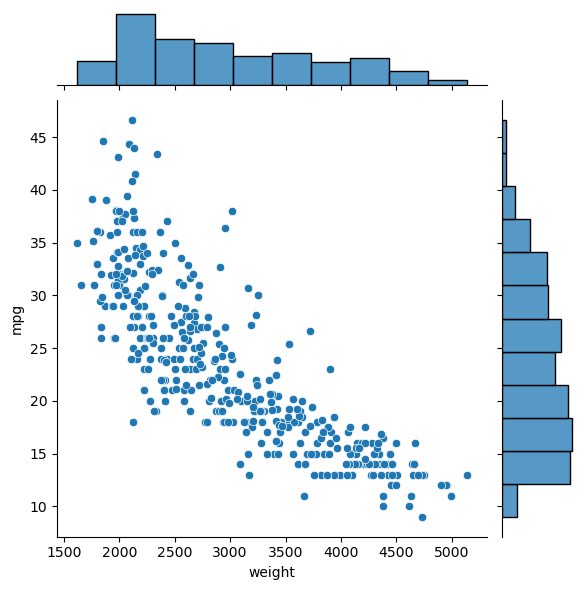

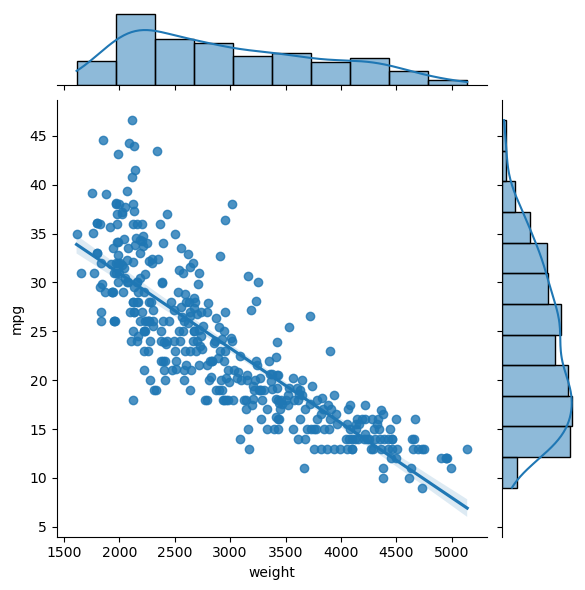

In [9]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x = 'weight', y = 'mpg', data = ndf) # 회귀선 없음
sns.jointplot(x = 'weight', y = 'mpg', kind = 'reg', data = ndf) # 회귀선 표시
plt.show()
plt.close()

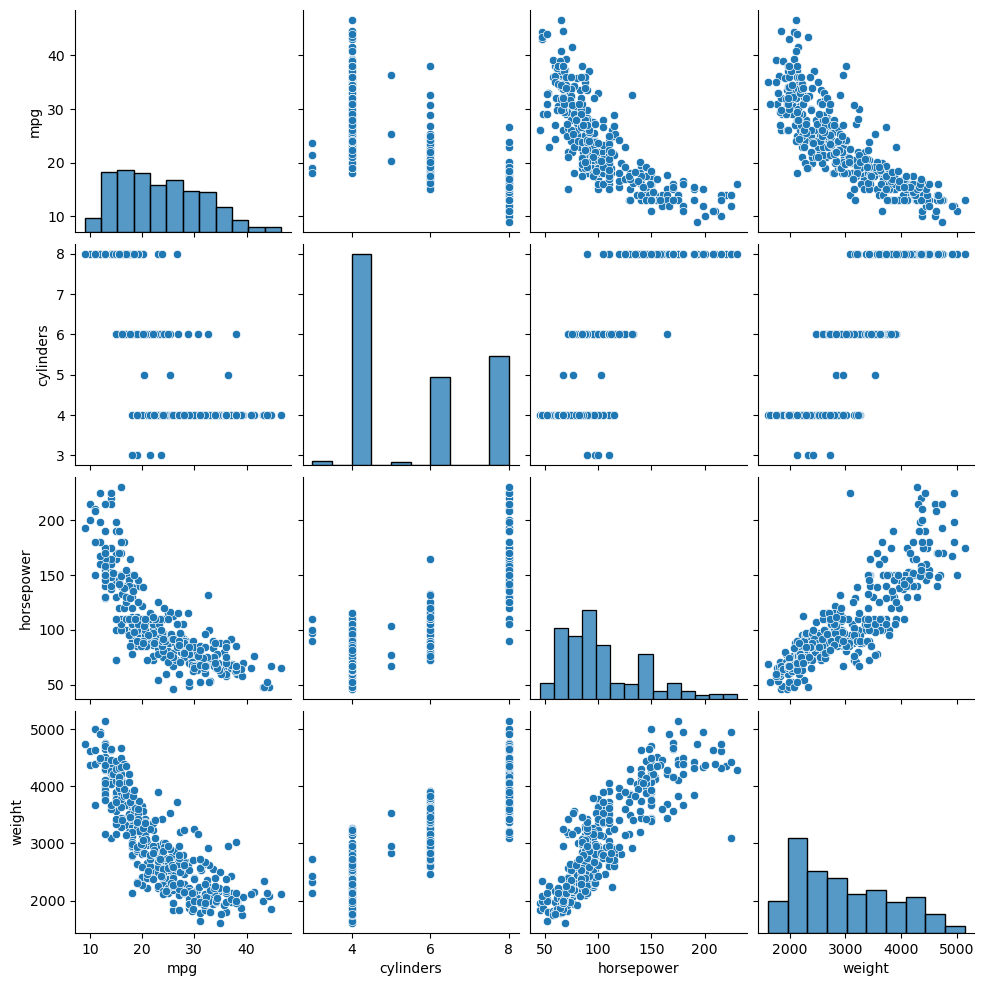

In [10]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

Step 4 - 훈련/검증 데이터 분할

In [14]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data) / 검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['weight']] # 독립 변수 x
Y = ndf['mpg'] # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # 독립 변수
                                                    Y, # 종속 변수
                                                    test_size = 0.3, # 검증 30%
                                                    random_state = 10) # 랜덤 추출 값

print('train data 개수:', len(X_train))
print('test data 개수:', len(y_test))

train data 개수: 274
test data 개수: 118


Step 5 - 모형 학습 및 검증

In [15]:
'''
[Step 5] 단순회귀분석 모형 만들기 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# test data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299322


In [16]:
# 회귀식의 기울기
print('기울기 a:', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b:', lr.intercept_)

기울기 a: [-0.00775343]


y절편 b: 46.7103662572801


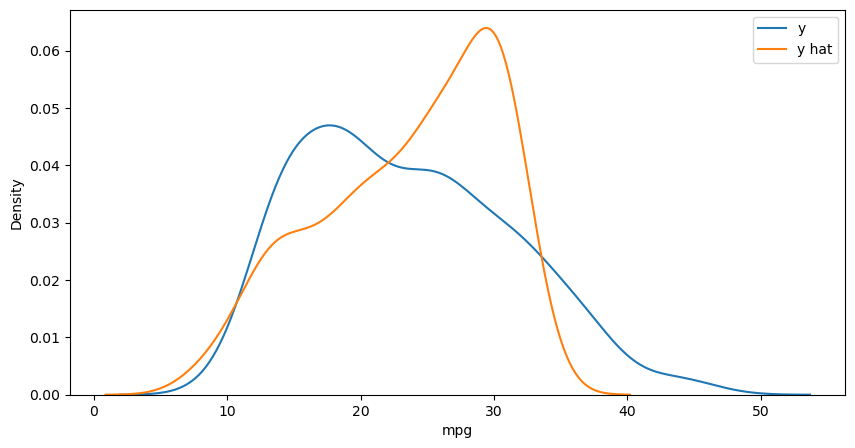

In [19]:
# 모형 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.kdeplot(Y, label = 'y')
ax2 = sns.kdeplot(y_hat, label = 'y hat', ax = ax1)
plt.legend()
plt.show()

- 출력된 결과를 보면 실제 값은 왼쪽으로 편향되어 있고, 예측값은 반대로 오른쪽으로 편중되는 경향을 보임
- 따라서 독립 변수(weight)와 종속 변수(mpg) 사이에 선형관계가 있지만, 모형의 오차를 더 줄일 필요가 있어 보임
- 앞에서 그린 산점보를 보면 직선보다는 곡선의 형태가 더 적합해 보임
- 이런 경우 비선형 회귀 분석을 통해 모형의 정확도를 높일 수 있음

#### 다항회귀분석

- 단순회귀분석 : 두 변수 간의 관계를 직선 형태로 설명하는 알고리즘
- 독립 변수 X와 종속 변수 Y 사이에 선형의 상관관계가 있지만, 직선보다는 곡선으로 설명하는 것이 적합할 때는 단순회귀분석은 부적합
- 다항 함수를 사용하면 보다 복잡한 곡선 형태의 회귀선 표현 가능

다항회귀분석(Polynomial Regression)
- 이차함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
- 다항회귀분석 모형은 학습을 통해 3개의 계수 a, b, c를 찾아서 모형을 완성

##### 데이터 준비

In [9]:
# 7.2_polynomial_regression.py

# 기본라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1~3] 데이터 준비
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/Users/youju/Downloads/5674-833_4th/part7/auto-mpg.csv', header = None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace = True) # '?'을 np.nan으로 변경
df.dropna(subset = ['horsepower'], axis = 0, inplace = True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자형을 실수형으로 변환

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data와 test data로 구분(7:3 비율)
X = ndf[['weight']] # 독립 변수 X
y = ndf['mpg'] # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('훈련 데이터:', X_train.shape)
print('검증 데이터:', X_test.shape)

훈련 데이터: (274, 1)
검증 데이터: (118, 1)


##### 모형 학습 및 검증

In [4]:
'''
[Step 4] 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree = 2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변형

print('원 데이터:', X_train.shape)
print('2차항 변환 데이터:', X_train_poly.shape)

원 데이터: (274, 1)
2차항 변환 데이터: (274, 3)


In [ ]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test) # X-test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test) # 예측 능력 평가
print(r_square)

0.7087009262975688


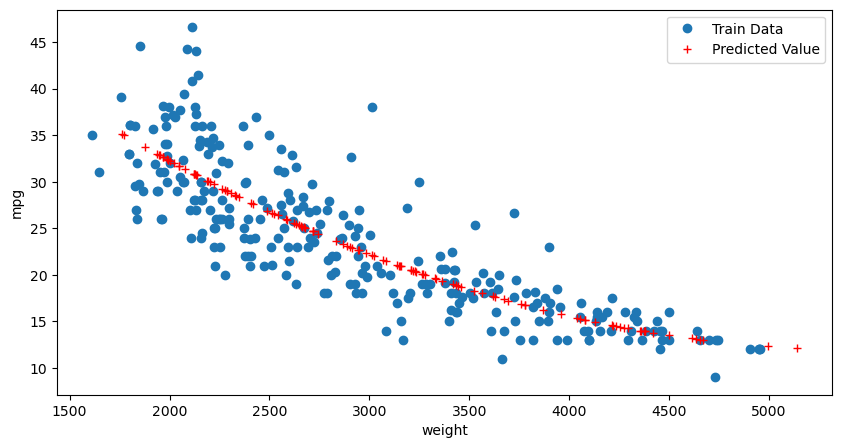

In [ ]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly) # 2차항으로 변환된 검증뎅이터를 메서드에 입력하여 예측한 결과

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label = 'Train Data') # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

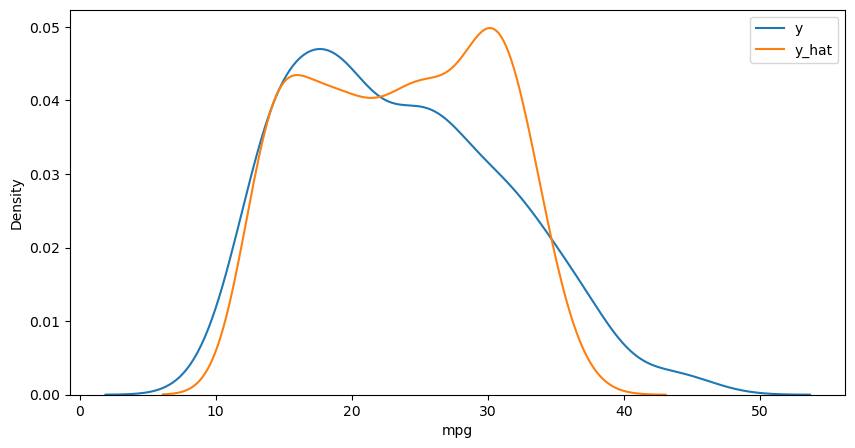

In [8]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize = (10, 5))
ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_hat, label = "y_hat", ax = ax1)
plt.legend()
plt.show()

- 앞에서 살펴본 단순회귀분석의 결과와 비교할 때 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소함    
=> 더 적함한 모형

#### 다중회귀분석

- 단순회귀분석 : 종속 변수 Y에 영향을 주는 독립 변수 X가 하나인 경우


- 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에는 다중회귀분석(Multivariate Regression)을 사용

- 수학적으로는 종속 변수 Y와 독립 변수 X 간의 관계를 Y = a1X1 + a2X2 + ... + anXn과 같은 함수식으로 표현
- 다중회귀분석 알고리즘은 각 독랍 변수의 계수(a1, a2, a3, ... an)와 상수항(b)에 적절한 값들을 찾아서 모형을 완성
- 모형의 예측값인 종속 변수에 대한 실제 데이터를 알고 있는 상태에서 학습하기 때문에 지도학습으로 분류

##### 데이터 준비

In [10]:
# 7.3_multivariate_regression.py

# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1~3] 데이터 준비
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/Users/youju/Downloads/5674-833_4th/part7/auto-mpg.csv', header = None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace = True) # '?'을 np.nan으로 변경
df.dropna(subset = ['horsepower'], axis = 0, inplace = True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자형을 실수형으로 변환

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

'''
[Step 4] 데이터셋 구분 - 훈련용(train data) / 검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['cylinders', 'horsepower', 'weight']] # 독립 변수 X1, X2, X3
y = ndf['mpg'] # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('훈련 데이터:', X_train.shape)
print('검증 데이터:', X_test.shape)

훈련 데이터: (274, 3)
검증 데이터: (118, 3)


##### 모형 학습 및 검증

In [12]:
'''
[Step 5] 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test) # 모형의 평가 지표
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a:', lr.coef_)
print('\n')

# 회귀식의 y절편
print('상수항 b:', lr.intercept_)

0.6939048496695597


X 변수의 계수 a: [-0.60691288 -0.03714088 -0.00522268]


상수항 b: 46.41435126963404


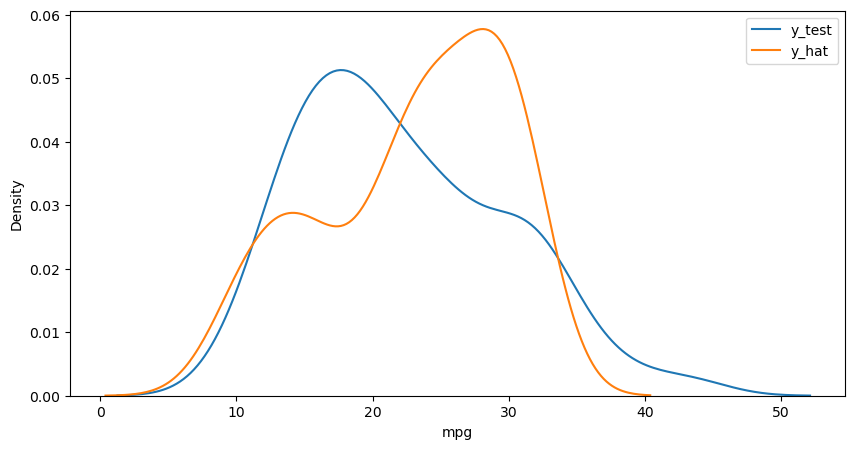

In [13]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize = (10, 5))
ax1 = sns.kdeplot(y_test, label = "y_test")
ax2 = sns.kdeplot(y_hat, label = "y_hat", ax = ax1)
plt.legend()
plt.show()

- 단순회귀분석의 결과와 비교할 때 데이터가 어느 한쪽으로 편향되는 경향은 그대로 남아 있지만 그래프의 첨도(뾰족한 정도)가 약간 누그러진 것을 볼 수 있다